# 第7回 分散分析


## はじめに

前回までの講義で、推定や仮説検定の考え方、基本的な検定手法などを扱いました。

検定では、AとBのグループを比較する。の様な比較的シンプルな状況を考えていましたが、実際の生物学における実験では、より多様な状況を考慮することが多いです。

例えば、異なる肥料を異なる品種に様々な環境下で与えた際の効果を調べる、等。

しかし、多くの場合、実験に使用できるスペースや費用、労力などには制限があり、制限のもとで実施した実験をもとに解析を行う必要があります。

このとき、**実験計画法**とよばれる実験配置や解析の方法の知識が必要になります。

また、実験計画法に基づいて得られたデータを解析する際に用いられることが多い**分散分析**についても触れます。


## 実験計画法

実験で生じる誤差には大きく分けて**偶然誤差**と**系統誤差**の2種類存在します。

偶然誤差は、まったく同じ条件で測定を繰り返した場合に見られる、偶然生じてしまう誤差のことを指します。

系統誤差は、圃場のムラや実験に供与した植物の生育具合など、実験結果に偏りを生む要因による誤差を指します。

例えば、ある植物10個体を、肥料を与える5個体と与えない5個体に分けて、温室Aで育てた場合に、5個体の間で生じる誤差が偶然誤差になります。
もしスペースの問題で温室Aと温室Bに分けて育てる必要があった場合に、温室AとBの間で生じる差が系統誤差として現れます。

この時、肥料を与えた5個体を温室A、肥料を与えない5個体を温室Bで育ててしまうと、その差が肥料によるものなのか、温室によるものなのかが分からなくなります。

この様な状況を「肥料」と「温室」の効果が**交絡**していると言います。

交絡が生じると見たい処理の効果の検出力が下がってしまうので、交絡が起きないように実験計画は考える必要があります。



### フィッシャーの3原則

この様な実験誤差を制御するために、実験計画法を開発したフィッシャーは**反復・無作為化・局所管理**という３つの原則を提唱しました。

#### (1)反復

先ほどの肥料の効果を見る例では、肥料を与える個体を5個体用いました。

この様な同一処理区の実験の繰り返しを**反復**と呼びます。

以前学んだ通り、各処理区の標本平均は母平均の周りにばらつき、反復数を増やすほど、母平均からのばらつきは小さくなるので、偶然誤差を小さくすることができます。

#### (2)無作為化

温室Aと温室Bの間では系統誤差が生じる可能性があるので、処理ごとに温室を変えてしまうと、交絡が生じてしまいます。

そのため、各環境ごとにいくつかの試験区に分割し、各処理グループの個体をランダムに割り当てる場合が多いです。

この様な処理を**無作為化**といいます。

ランダムに割り当てることで、温室による系統誤差は肥料の処理とは切り離され、処理区内に生じる偶然誤差として扱った解析が可能になります。

#### (3)局所管理

局所管理は、実験全体をいくつかのブロックに分け、ブロック内ではできるだけ均一に管理をすることを指します。

これにより、管理の不均一による系統誤差の大部分をブロック間の差として扱う統計解析が可能となります。

では実際に、以上の3つの原則に基づく代表的な実験計画法である、**完全無作為化法**、**乱塊法**について見ていきます。



### 完全無作為法

完全無作為法は、3原則のうち反復と無作為化を採用した実験配置になります。

処理A, B, C, Dを施した植物の収量を完全無作為化法で各5反復ずつ行った場合、

下図のように、圃場を20区画(処理数x反復数)に分割し、各処理の個体をランダムに割り付ける。

\begin{array}{|c|c|c|c|c|}  \hline
  1-B & 2-A & 3-D & 4-B & 5-D \\ \hline \hline
  6-C & 7-A & 8-B & 9-C & 10-D \\ \hline
  11-D & 12-C & 13-B & 14-C & 15-A \\ \hline
  16-C & 17-A & 18-B & 19-A & 20-D \\ \hline
\end{array}

このようなランダムな順番はRによって生じさせることができます。

色々やり方はありますが一例を載せておきます。

In [ ]:
# Rで乱序数を生じさせるプログラム
n <- 20
data <- 1:n
x <- runif(n)
y <- cbind(data, x[1:n])
y <- y[order(y[,2]),]
data <- y[,1]
data

[1] 10 11  3  9 14  2 13 16 19  4  6  7  5  8 18 12  1 17 15 20

得られた実験結果から処理A,B,C,Dの効果を調べるには、後程学習する一元配置の分散分析と呼ばれる方法で処理をすることになります。

\begin{array}{ccccc}  \hline
 処理 & A & B & C & D \\ \hline
  & 12 & 7 & 11 & 9 \\
  & 11 & 9 & 13 & 10 \\
  反復 & 8 & 12 & 10 & 12 \\
  & 9 & 10 & 13 & 9 \\
  & 9 & 7 & 14 & 11 \\ \hline
\end{array}


### 乱塊法

乱塊法はフィッシャーの3原則のすべて(反復・無作為化・局所管理)を満たす実験配置になります。

先ほどの完全無作為化法の場合、圃場の右端(5,10,15,20)にD処理のものが多くなっていました。

同じ圃場内でも、左右では違いがあることが予想されるので、この様な偏りは避けたいです。

この様な状況を避けるため、乱塊法では、圃場を反復数と同じブロックに分割します。

そして、各ブロックに各処理の個体が1回ずつ入るように配置します。ブロック内の配置は完全無作為化法と同じように、無作為に配置します。

\begin{array}{c|c|c|c|c|}
  ブロック & 1 & 2 & 3 & 4 & 5 \\ \hline
  & B & D & C & B & A \\
  & A & B & D & C & D \\
  & D & A & B & D & C \\
  & C & C & A & A & B \\ \hline
\end{array}

この様に配置したうえで、局所管理の原則に従い、ブロック内が出来るだけ均一になるように管理し、生じるばらつきはブロック間のものとなるようにします。


得られた実験結果から処理の効果を調べるには、処理A,B,C,Dの効果だけでなく、ブロックの効果も考慮する必要があるため、後程学習する二元配置の分散分析と呼ばれる方法で処理をすることになります。


\begin{array}{ccccccc}  \hline
 ブロック & 1 & 2 & 3 & 4 & 5 & 合計 & 平均 \\ \hline
 処理A & 12 & 14 & 11 & 9 & 12 & 58 & 11.6 \\
 処理B & 11 & 9 & 13 & 10 & 10 & 53 & 10.6 \\
 処理C & 10 & 12 & 10 & 12 & 11 & 55 & 11 \\
 処理D & 9 & 10 & 9 & 9 & 12 & 49 & 9.8 \\ \hline
 合計 & 42 & 45 & 43 & 40 & 45 & 215 \\ \hline
 平均 & 10.5 & 11.25 & 10.75 & 10 & 11.25 \\ \hline
\end{array}

### (参考)ラテン方格法

系統誤差を生じる要因が２つある場合には2種のブロックを行と列それぞれに設定するラテン方格法が用いられます。

個体数が限定されており、同時に反復を多数設置できない場合などに用いられます。

例えば、ある動物に処理A,B,C,Dを行った効果を見たい時、反復を4回ずつとるには4x4の計16個体を同時に飼育する必要があります。

施設の制限で一度に16個体を飼育することが難しい場合、4個体を用いて、実験を4期間(Ⅰ,Ⅱ,Ⅲ,Ⅳ)に分けて行う、といったことをよく行います。

この時、下のようにどの期間・どの個体においても、処理A,B,C,Dが一度は出てくるように配置するのがラテン方格式となります。

\begin{array}{c|c|c|c|c|}
   & 個体1 & 個体2 & 個体3 & 個体4 \\ \hline
  期間Ⅰ & A & B & C & D \\
  期間Ⅱ & B & C & D & A \\
  期間Ⅲ & C & D & A & B \\
  期間Ⅳ & D & A & B & C \\ \hline
\end{array}




## 分散分析

2つのグループの母平均を比較する際には、$t$検定を用いて検定を行っていました。

しかし、先ほどの実験計画法の例で見られたように、3つ以上のグループの平均を比較する必要が出てきた場合に、同じように$t$検定を用いても良いでしょうか？


### 多重比較

例えば下の様な処理A,B,Cの結果が得られたときに、A,B,C間で比較をしたいとします。

このとき、比較としてはA vs B, B vs C, C vs Aの3種類の比較をする必要があります。

この様に比較を繰り返すことを**多重比較**と言います。

この時、それぞれの比較を$t$検定で実施し、A vs Bの$t$検定, B vs Cの$t$検定, C vs Aの$t$検定と、比較を繰り返し行えば良いかというと、それは妥当な方法ではありません。

\begin{array}{ccccc}  \hline
 処理 & A & B & C \\ \hline
  & 12 & 7 & 11 \\
  & 11 & 9 & 13 \\
  反復 & 8 & 12 & 10 \\
  & 9 & 10 & 13 \\
  & 9 & 7 & 14 \\ \hline
\end{array}

なぜかというと、前回の講義で、仮説検定はある程度誤りの可能性(過誤)を含んだ上で行われるということを説明しました。

本当は帰無仮説($H_0$)が正しいのに、対立仮説($H_1$)を採択してしまう過誤が第一種の過誤(Type I error)で、その確率が $\alpha$、つまり有意水準のことです。

$\alpha$の確率で生じる稀な標本を観測してしまったがために、本当は正しい帰無仮説を棄却してしまう場合になります。

つまり、仮説検定は1度だけ行う場合は第一種の過誤は$\alpha$に抑えられますが、

検定を繰り返してしまうと、この第一種の過誤が生じる確率が上がってしまい、有意水準が$\alpha$であるとは言えなくなります。

これを**多重性の問題**と呼び、多重比較を行う際には、有意水準を厳しく設定するなどして第一種の過誤を抑え込む必要があります。

### 一元配置の分散分析

**分散分析**(analysis of variance: **ANOVA**)は、この様な点を考慮に入れて、得られた観測地のばらつきの原因について解析するための手法になります。

\begin{array}{cccc}  \hline
 施肥量 & 10g & 20g & 30g \\ \hline
  & 30 & 31 & 38  \\
  反復 & 25 & 26 & 35 \\
  & 29 & 30 & 35 \\ \hline
\end{array}

この施肥量の様に、実験結果に対して影響を及ぼす原因を**因子**と呼び、各因子について設定された条件(10g, 20g, 30g)を**水準**と呼びます。

今回の様に、1つの因子のみをとりあげた実験計画によって得られたデータの分散分析を、**一元配置の分散分析**と呼びます。

一元配置のデータは一般的に下の様に表されます。

\begin{array}{cc|cccc}  \hline
因子の水準 & & A_1 & A_2 & ... & Ai & ... & A_a \\ \hline
 & 1 & y_{11} & y_{21} & ... & y_{i1} & ... & y_{a1} \\
 & 2 & y_{12} & y_{22} & ... & y_{i2} & ... & y_{a2}  \\
  反復 & ... & ... & ... & ... & ... & ... & ...  \\
 & j & y_{1j} & y_{2j} & ... & y_{ij} & ... & y_{aj}  \\
 & ... & ... & ... & ... & ... & ... & ... \\
 & n & y_{1n} & y_{2n} & ... & y_{in} & ... & y_{an}  \\ \hline
 小計 & & y_{1\cdot} & y_{2\cdot} & ... & y_{i\cdot} & ... & y_{a\cdot} \\
 観測値数 & & n & n & ... & n & ... & n \\
 水準平均 & & \bar{y_{1\cdot}} & \bar{y_{2\cdot}} & ... & \bar{y_{i\cdot}} & ... & \bar{y_{a\cdot}} \\ \hline
\end{array}

\begin{array}{cc|cccc}
観測値数:N=n\times a \\
総和:y_{\cdot\cdot}= \sum_{i}\sum_{j}y_{ij} \\
総平均:\bar{y_{\cdot\cdot}}= y_{\cdot\cdot}/N \\
\end{array}

分散分析の考え方を説明していくと、

まずこの様なデータが得られた際、$y_{11} \sim y_{an}$のデータは当然ばらついているはずです。

このばらつきが生じる原因は2種類考えられます。

まず1つ目が複数の水準に起因するばらつき。(施肥量が10gと30gの水準で観測値が大きく異なる、等に起因するばらつき。)

2つ目が同一水準下で偶然生じるばらつきになります。

この1つ目の水準に起因するばらつきが、偶然の誤差によるばらつきと比べて意味がある大きさなのかどうか、を調べることが分散分析となります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter7/baratuki.png?raw=true" alt="title" height="250px">

因子による効果は**主効果**と呼ばれます。

観測値全体のばらつきを**総変動**と呼び、総変動は、因子の水準の違いに起因するばらつきである**級間変動**と、同じ水準内で偶然生じるばらつき**級内変動**とに分解できます。

$総変動 = 級間変動 + 級内変動$

つまり、分散分析とは級間変動が級内変動に比べて有意に大きいか否かを調べる手法、となります。

具体的な手順を順にみていきます。

#### 1. 観測値の総平均からのズレを分解する

先ほど示した通り、総変動を水準の効果による級間変動と偶然による級内変動に分解して捉える必要があります。

総変動や級間変動、級内変動を具体的にデータから考えていくと、

まず個々の観測値$y_{ij}$について考えてみます。

観測値$y_{ij}$の、データ全体の平均(総平均$\bar{y_{\cdot\cdot}}$)からのズレ($d_1$)は、

水準の効果に起因する水準平均$\bar{y_{i\cdot}}$の総平均$\bar{y_{\cdot\cdot}}$からのズレ($d_2$)と、

偶然誤差による観測値$y_{ij}$の水準平均$\bar{y_{i\cdot}}$からのズレ($d_3$)、

に分解して捉えることができます。

つまり、

$(y_{ij}-\bar{y_{\cdot\cdot}})=(\bar{y_{i\cdot}}-\bar{y_{\cdot\cdot}})+(y_{ij}-\bar{y_{i\cdot}})$

$d_1 = d_2 + d_3$　と表すことができます。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter7/zure.png?raw=true" alt="title" height="250px">

#### 2. 変動を偏差平方和で表す

先ほどの観測値の総平均からの偏差($d_1$)、水準平均の総平均からの偏差($d_2$)、偶然による観測値の水準平均からの偏差($d_3$)は、各観測値ごと・各水準ごとに値が出るので、

全ての観測値について足し合わせて、データ全体としてまとめて捉える必要があります。

ただし、平均からの差を合計すると0になってしまうので、

例) $\sum_{i}\sum_{j}(y_{ij}-\bar{y_{\cdot\cdot}})=0$

分散分析では、個々の偏差を2乗したものの和、**偏差平方和**によってデータの変動を表します。

* 総変動を表す**総平方和**$S_T=\sum_{i}\sum_{j}(y_{ij}-\bar{y_{\cdot\cdot}})^2$

* 級間変動を表す**級間平方和**$S_A = \sum_{i}\sum_{j}(\bar{y_{i\cdot}}-\bar{y_{\cdot\cdot}})^2$

* 級内変動を表す**残差平方和**$S_e = \sum_{i}\sum_{j}(\bar{y_{ij}}-\bar{y_{i\cdot}})^2$


<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter7/hendou.png?raw=true" alt="title" height="250px">

実際に下記の様なデータが得られた場合に、

\begin{array}{cccc}  \hline
 施肥量 & 10g & 20g & 30g \\ \hline
  & 30 & 31 & 38  \\
  反復 & 25 & 26 & 35 \\
  & 29 & 30 & 35 \\ \hline
\end{array}

このデータから変動を計算してみると...

In [ ]:
# 総平方和、級間平方和、残差平方和を求める
all <- c(30, 25, 29, 31, 26, 30, 38, 35, 35)
A1 <- c(30, 25, 29)
A2 <- c(31, 26, 30)
A3 <- c(38, 35, 35)

all_mean <- mean(all)
A1_mean <- mean(A1)
A2_mean <- mean(A2)
A3_mean <- mean(A3)

ST <- sum((all - all_mean)^2)
SA <- 3*(A1_mean - all_mean)^2 + 3*(A2_mean - all_mean)^2 + 3*(A3_mean - all_mean)^2
Se <- sum((A1 - A1_mean)^2) + sum((A2 - A2_mean)^2) + sum((A3 - A3_mean)^2)

print(ST)
print(SA)
print(Se)

[1] 148
[1] 114
[1] 34


ということで、$S_T = 148, S_A = 114, S_e = 34$となり、


総平方和$S_T$ = 級間平方和$S_A$ $+$ 残差平方和$S_e$が成り立っています。

これでデータ全体のばらつきを級間変動と級内変動に分割できました。

#### 3. 級間変動と級内変動の大きさを比較

平方和$S_A$と$S_e$はそれらを構成している変数の数が多くなれば、大きな値をとりやすくなります。

そのため、級間変動が級内変動と比べて意味のある大きさなのかどうかを比較するためには、その部分を考慮する必要があります。

よって、級間平方和と残差平方和をそれぞれの**自由度**で割った**平均平方**を求めて、その比の大きさを調べます。

級間平方和$S_A$は$\bar{y_{1\cdot}}-\bar{y_{\cdot\cdot}}, \bar{y_{2\cdot}}-\bar{y_{\cdot\cdot}}, ..., \bar{y_{a\cdot}}-\bar{y_{\cdot\cdot}}$という$a$個の要素を持ち、そのうち$a-1$個が決まれば残りの1個も決まるため、

級間平方和$S_A$の自由度$\nu_A$は$a-1$になります。

級内平方和$S_e$は各水準毎に$y_{i1} - \bar{y_{i\cdot}}, y_{i2} - \bar{y_{i\cdot}}, ... y_{in} - \bar{y_{i\cdot}}$という$n$個の要素から成る平方和なので、各水準毎に$n-1$個が決まれば残りの1個も決まるため、

級内平方和$S_e$の自由度$\nu_{e}$は$a\times(n-1)$となります。

総平方和$S_T$の自由度$\nu_{T}$は$N-1 = a\times n - 1$なので、

自由度についても$\nu_T = \nu_A + \nu_e$が成り立ちます。

\begin{array}{cccc}  \hline
 施肥量 & 10g & 20g & 30g \\ \hline
  & 30 & 31 & 38  \\
  反復 & 25 & 26 & 35 \\
  & 29 & 30 & 35 \\ \hline
\end{array}

今回のデータだと、

$\nu_A = 3 - 1 = 2$

$\nu_e = 3 \times (3 - 1) = 6$

となります。

級間平方和と残差平方和をそれぞれの**自由度**で割った**平均平方**を計算すると、

$V_A = S_A / \nu_A = 114 / 2 = 57$

$V_e = S_e / \nu_e = 34 / 6 = 5.666...$

となります。

分散分析では、この様に求めた級間変動と級内変動の2つの平均平方の比$V_A / V_e$(これを**分散比**と呼ぶ)の大きさで、級間変動が級内変動と比較して大きいか評価します。

#### 4. 帰無仮説と検定

この計算した分散比を評価する方法になります。

分散分析での帰無仮説は、$a$個ある水準の母平均を$\mu_1, \mu_2, ..., \mu_a$とすると、

帰無仮説$H_0: \mu_1 = \mu_2 = ... = \mu_a$ (全ての水準の間に差はない)

対立仮説$H_1:$ 少なくともある2つの水準間には差がある

となります。

このとき、平方和$S_A, S_e$はそれぞれ自由度$\nu_A, \nu_e$の$\chi^2$分布に従うことが知られています。

(導出は「自然科学の統計学」(東京大学出版)等を参照)

よって、母分散の比検定で扱った通り、帰無仮説のもとで、

$F = \dfrac{S_A/\nu_A}{S_e/\nu_e}$

が自由度$\nu_A, \nu_e$の$F$分布$F(\nu_A, \nu_e)$に従うので、

このことを利用して$F$検定で仮説を検定できます。

これが**分散分析検定**となります。

今回の場合、

$V_A = S_A / \nu_A = 114 / 2 = 57$

$V_e = S_e / \nu_e = 34 / 6 = 5.666...$

から分散比を計算して、

$F = V_A/V_e = 57/5.666... = 10.0588$

と$F$値を求められたので、

$F$分布$F(\nu_A, \nu_e)$のパーセント点$F_{0.05}(2,6)$を求めると、

In [ ]:
# 自由度2, 6のF分布における95%パーセント点をqf関数で求める
qf(0.95, 2, 6)

[1] 5.143253

ということで、$F_{0.05}(2,6) < F$となり、有意水準5%のもとで帰無仮説は棄却される。

つまり、施肥量の効果は有意水準5%で有意である、と言えます。

#### 5. 分散分析表

以上の様な分散分析の結果は、最終的に下の様な**分散分析表**としてまとめることが多いです。

\begin{array}{c|cccc}  \hline
 要因 & 平方和 & 自由度 & 平均平方 & F値 \\ \hline
  級間A & S_A & \nu_A & V_A=S_A/\nu_A & F=V_A/V_e \\
  誤差E & S_e & \nu_e & V_e=S_e/\nu_e & \\ \hline
  計 & S_T & \nu_T & & \\ \hline
\end{array}

今回の場合だと、下表の様に値が求まりました。

\begin{array}{c|cccc}  \hline
 要因 & 平方和 & 自由度 & 平均平方 & F値 \\ \hline
  施肥量 & 114 & 2 & 57 & 10.0588^* \\
  誤差 & 34 & 6 & 5.6667 & \\ \hline
  計 & 148 & 8 & & \\ \hline
\end{array}

このとき、$F$検定を行った結果、5%水準で有意であれば$*$を、1%水準で有意であれば$**$を分散比$F$の右肩に記す場合が多いです。



#### 多重比較

さて、今回のデータでは施肥量の効果が5%の有意水準で有意であると判定されました。

ただし、これはあくまでも少なくともある2つの水準間には差があるということが分かっただけで、どの水準間に差があるのかは分かりません。

そこで**多重比較**により平均値間の差の検定を行います。

最初の方でも述べた通り、検定を繰り返してしまうと、第一種の過誤が生じる確率が上がってしまうので、第一種の過誤を抑え込む方法を利用する必要があります。

Tukey-Kramer法やDunnet法、Bonferroni法など様々な手法があります。

目的や扱うデータの特徴に応じて適切なものを選ぶ必要があります。

* Dunnet法 ... ある基準となる群と他の全ての群を比較する検定方法 (A vs B, A vs C)
* Tukey-Kramer法 ... 全ての群間を比較する検定方法 (A vs B, B vs C, C vs A)
* Bonferroni法 ... 有意水準を補正する方法、検出力はかなり低くなるので保守的な検定方法
* 他、Scheffe法，Games–Howell法，Fisher PLSD法など。

一部のみ紹介しましたが、実際に自分の研究データで多重比較をする際には、類似する論文等を読み、適切な多重比較手法を調べて使用する必要がります。

今回は一例としてTukey-Kramer法を使用してみます。

RでTukey-Kramer法を使用するには`TurkeyHSD`関数を使用します。


In [ ]:
# TukeyHSD関数によるTurkey法を用いた多重比較
vx <- c(30, 25, 29, 31, 26, 30, 38, 35, 35)
fx=factor(rep(c("A_10g", "B_20g", "C_30g"), c(3, 3, 3)))
TukeyHSD(aov(vx~fx))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = vx ~ fx)

$fx
            diff       lwr       upr     p adj
B_20g-A_10g    1 -4.963654  6.963654 0.8672718
C_30g-A_10g    8  2.036346 13.963654 0.0147233
C_30g-B_20g    7  1.036346 12.963654 0.0263670


ということで、30gと10g、30gと20gを比較した際に、有意水準5%より低いp値が見られたので、これらの2群間に有意差があると判定できました。

#### 分散分析を多重比較検定の前にやる必要はあるのか？

こうしてみると、分散分析なんてやらずに、いきなり多重検定の手法で複数群間の比較をすれば良いのでは？という気がしてきます。

これはある意味正解で、分散分析をやらないといけない場合とそうでない場合とがあり、これは用いる多重比較法によって異なってきます。

例えばDunnett法やTukey-Kramer法では、分散分析で用いる$F$統計量とは異なる統計量を基に検定を行うため、

「分散分析では有意だが多重比較では有意ではない」や「分散分析では有意ではないが、多重比較では有意」みたいなことが起きる可能性があります。

そのため、これらの手法は分散分析とは独立した検定だと考えておく必要があります。

### 二元配置の分散分析

先ほどの実験では施肥量のみを因子として扱いましたが、他にも温度や湿度など、様々な因子が影響を与えます。

複数の因子を扱う実験では、それぞれの各因子単独の効果(**主効果**)だけではなく、それらの因子間で生じる**交互作用**も考慮に入れる必要があります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter7/kougo.png?raw=true" alt="title" height="250px">

複数の因子を考慮した実験を完全無作為化法で行う場合、それを**多元配置**と呼びます。

今回はその中でも最も簡単な2因子の場合である**二元配置**の場合における分散分析を扱います。

#### 繰り返しのある二元配置分散分析

まず、下の様な、施肥量と温度の2因子を考慮する場合を考えます。

施肥量3水準、温度2水準の6種類の処理に、それぞれ反復が2回ずつあるデータになっています。

\begin{array}{cccc}  \hline
 & 施肥量 & 10g & 20g & 30g \\ \hline
  温度 & 30度 & 30 & 31 & 38  \\
       & & 29 & 28 & 36 \\ \hline
  温度 & 20度 & 23 & 26 & 36 \\
       & & 22 & 27 & 35 \\ \hline
\end{array}

一般的に、水準$A$(施肥量)と水準$B$(温度)の組み合わせ$A_iB_j$での$k$番目の観測値を$y_{ijk}$とします。

$A$の水準数は$a$、$B$の水準数は$b$、反復は$r$とします。

全観測値の数は$n = a \times b \times r$と表せます。

今回のデータの場合は施肥量の水準数$a=3, 温度の水準数b=2, 反復r=2$ということになります。

#### 観測値の総平均からのズレを分解する

一元配置の時と同じように、総変動($S_T$)を級間変動($S_{AB}$)や誤差変動$S_e$に分解していきます。

今回は2因子あるので、級間変動$S_{AB}$は因子$A$による変動$S_A$と因子$B$による変動$S_B$、そして因子$A$と因子$B$の交互作用による変動$S_{A\times B}$に分解できます。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter7/hendou2.png?raw=true" alt="title" height="180px">

つまり、

$S_T = S_{AB}+S_e$

$S_{AB} = S_A + S_B + S_{A\times B}$

と表すことができます。

一元配置の時と同じように、データ全体におけるそれぞれの変動を表す偏差平方和は、

総変動を表す総平方和$S_T = \sum\limits_{i}\sum\limits_{j}\sum\limits_{k} (y_{ijk} - \bar{y_{\cdot\cdot\cdot}})^2$

級間変動を表す級間平方和$S_{AB} = \sum\limits_{i}\sum\limits_{j}\sum\limits_{k} (\bar{y_{ij\cdot}} - \bar{y_{\cdot\cdot\cdot}})^2$

因子Aによる変動を表すA間平方和$S_A = \sum\limits_{i}\sum\limits_{j}\sum\limits_{k} (\bar{y_{i\cdot\cdot}} - \bar{y_{\cdot\cdot\cdot}})^2$

因子Bによる変動を表すB間平方和$S_B = \sum\limits_{i}\sum\limits_{j}\sum\limits_{k} (\bar{y_{\cdot j\cdot}} - \bar{y_{\cdot\cdot\cdot}})^2$

交互作用による変動を表す交互作用平方和$S_{A\times B} = S_{AB} - S_A - S_B$

と求めることができます。

一例として下表のようなデータがあった場合、

\begin{array}{cccc}  \hline
 & 施肥量 & 10g & 20g & 30g \\ \hline
  温度 & 30度 & 30 & 31 & 38  \\
       & & 29 & 28 & 36 \\ \hline
  温度 & 20度 & 23 & 26 & 36 \\
       & & 22 & 27 & 35 \\ \hline
\end{array}

計算過程は省きますが(理由は後程説明)、上のデータから偏差平方和を計算すると、

$S_T = 304.9167$　$S_{AB} = 296.4167$　$S_A = 236.1667$　$S_B = 44.0833$　$S_{A\times B} = 16.1667$

と求めることができ、誤差変動は$S_e = S_T - S_{AB} = 8.5$　となります。





#### 級間変動と級内変動の大きさを比較

一元配置の時と同じように、平方和$S_A, S_B, S_{A \times B}$の大きさを$S_e$を基準に判定するためには、自由度を考慮する必要があります。

一元配置の時と同じ考え方で、各平方和の自由度は、

総平方和の自由度$\nu_T=n-1 = a \times b \times r - 1$

級間平方和の自由度$\nu_{AB}=a\times b - 1$

A間平方和の自由度$\nu_A=a-1$

B間平方和の自由度$\nu_B=b-1$

交互作用平方和の自由度$\nu_{A\times B}=\nu_{AB} - \nu_A - \nu_B = (a-1)\times(b-1)$

残差平方和の自由度$\nu_e = \nu_T - \nu_{AB} = a\times b \times (r-1)$

と求める形になります。

先ほど求めた各平方和を自由度で割って平均平方を求めると、

因子$A$の平均平方$V_A = S_A / \nu_A = 118.0833$

因子$B$の平均平方$V_B = S_B / \nu_B = 44.0833$

交互作用の平均平方$V_{A\times B} = S_{A\times B} / \nu_{A\times B} = 8.0833$

残差の平均平方$V_e = S_e/\nu_e = 1.4167$

と計算できます。

#### 帰無仮説と検定

今回の検定における帰無仮説は以下の3つになります。

$H_{0(A)}:$ 因子$A$の水準間に差はない(施肥量の効果は無い)

$H_{0(B)}:$ 因子$B$の水準間に差はない(温度の効果は無い)

$H_{0(A\times B)}:$ 因子$A,B$の間に交互作用はない(施肥量と温度の間に交互作用は無い)

それぞれの検定に用いられる$F$統計量は、分散比を計算して

$H_{0(A)}: F_A = V_A / V_e = 118.0833/1.4167 = 83.3529$

$H_{0(B)}: F_B = V_B / V_e = 44.0833/1.4167 = 31.1176$

$H_{0(A\times B)}: F_{A\times B} = V_{A\times B} / V_e = 8.0833/1.4167 = 5.7095$

と求められます。

それぞれの検定の自由度における$F$分布のパーセント点$F_{0.05}(2, 6), F_{0.05}(1, 6), F_{0.05}(2, 6)$を見ると








In [ ]:
# それぞれの検定におけるF分布のパーセンタイル点をqf関数で求める
qf(0.95, 2, 6)
qf(0.95, 1, 6)
qf(0.95, 2, 6)

[1] 5.143253

[1] 5.987378

[1] 5.143253

ということで、いずれの検定においても$F > F_{0.05}$となっているので、

因子$A$, 因子$B$, 交互作用いずれの効果も5%有意水準の下で有意であると判定されます。

以上の結果は、一元配置の時と同じように分散分析表として書くことができます。

\begin{array}{c|cccc}  \hline
 要因 & 平方和 & 自由度 & 平均平方 & F値 \\ \hline
  級間A & S_A & \nu_A & V_A=S_A/\nu_A & F_A=V_A/V_e \\
  級間B & S_B & \nu_B & V_B=S_B/\nu_B & F_B=V_B/V_e \\
  交互作用A\times B & S_{A\times B} & \nu_{A\times B} & V_{A\times B}=S_{A\times B}/\nu_{A\times B} & F_{A\times B}=V_{A\times B}/V_e \\
  誤差E & S_e & \nu_e & V_e=S_e/\nu_e & \\ \hline
  計 & S_T & \nu_T & & \\ \hline
\end{array}

実際に計算した結果は、

\begin{array}{c|cccc}  \hline
 要因 & 平方和 & 自由度 & 平均平方 & F値 \\ \hline
  施肥量 & 236.1667 & 2 & 118.0833 & 83.3529^{*} \\
  温度 & 44.0833 & 1 & 44.0833 & 31.1176^{*} \\
  施肥量\times 温度 & 16.1667 & 2 & 8.0833 & 5.7059^{*} \\
  誤差 & 8.5 & 6 & 1.4167 & \\ \hline
\end{array}

となります。

#### RによるANOVAの実施

さて、二元配置の例では計算を省略しましたが、理由があります。

当然ですが、他の検定等と同様に、分散分析を実行する`aov`という関数がRにはあります。

この関数を使用することで、煩わしい偏差平方和や平均平方の計算を行ってくれます。

`aov`関数を使用するには、データフレームにデータを整理しておく必要があります。


In [ ]:
# 分散分析を実施するaov関数のためにデータフレームを作成する
size <- c(30, 29, 23, 22, 31, 28, 26, 27, 38, 36, 36, 35)
fertilizer <- factor(rep(c("A_10g", "A_20g", "A_30g"), c(4, 4, 4)))
temperature <- factor(rep(rep(c("B_30", "B_20"), c(2, 2)), 3))
df <- data.frame(fertilizer=fertilizer, temperature=temperature, size=size)
df

fertilizer,temperature,size
<fct>,<fct>,<dbl>
A_10g,B_30,30
A_10g,B_30,29
A_10g,B_20,23
A_10g,B_20,22
A_20g,B_30,31
A_20g,B_30,28
A_20g,B_20,26
A_20g,B_20,27
A_30g,B_30,38


データをこの様なデータフレーム形式にまとめておけば、分散分析をすぐに実施できます。

`aov`関数を用いた繰り返しのある二元配置の分散分析は下の様に実行します。

```
# 分散分析を実行し、anova.resultという変数に結果を入れる
anova_result <- aov(観測値 ~ 要因A + 要因B + 要因A*要因B, data=データフレーム名)

# 結果の表示
summary(anova_result)

# そのまま多重検定の実行も可能
TukeyHSD(anova_result)
```

In [ ]:
# aov関数で二元配置の分散分析を実施する
anova_result <- aov(size ~ fertilizer+temperature+fertilizer*temperature, data=df)
summary(anova_result)
TukeyHSD(anova_result)

                       Df Sum Sq Mean Sq F value   Pr(>F)    
fertilizer              2 236.17  118.08  83.353 4.19e-05 ***
temperature             1  44.08   44.08  31.118  0.00141 ** 
fertilizer:temperature  2  16.17    8.08   5.706  0.04092 *  
Residuals               6   8.50    1.42                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = size ~ fertilizer + temperature + fertilizer * temperature, data = df)

$fertilizer
             diff        lwr       upr     p adj
A_20g-A_10g  2.00 -0.5823377  4.582338 0.1195175
A_30g-A_10g 10.25  7.6676623 12.832338 0.0000460
A_30g-A_20g  8.25  5.6676623 10.832338 0.0001598

$temperature
              diff      lwr      upr     p adj
B_30-B_20 3.833333 2.151854 5.514813 0.0014087

$`fertilizer:temperature`
                               diff         lwr       upr     p adj
A_20g:B_20-A_10g:B_20  4.000000e+00  -0.7369651  8.736965 0.0979429
A_30g:B_20-A_10g:B_20  1.300000e+01   8.2630349 17.736965 0.0002813
A_10g:B_30-A_10g:B_20  7.000000e+00   2.2630349 11.736965 0.0080861
A_20g:B_30-A_10g:B_20  7.000000e+00   2.2630349 11.736965 0.0080861
A_30g:B_30-A_10g:B_20  1.450000e+01   9.7630349 19.236965 0.0001512
A_30g:B_20-A_20g:B_20  9.000000e+00   4.2630349 13.736965 0.0021706
A_10g:B_30-A_2

この様な形で、Rの関数を使用することで簡単に分散分析を実行できます。

また、多重検定もそのままの流れで実施することができます。

ただ、交互作用をp値などでパッと理解することは難しいので、交互作用の効果が有意だと認められた場合、

データをグラフ化すると分かりやすくなると思います。

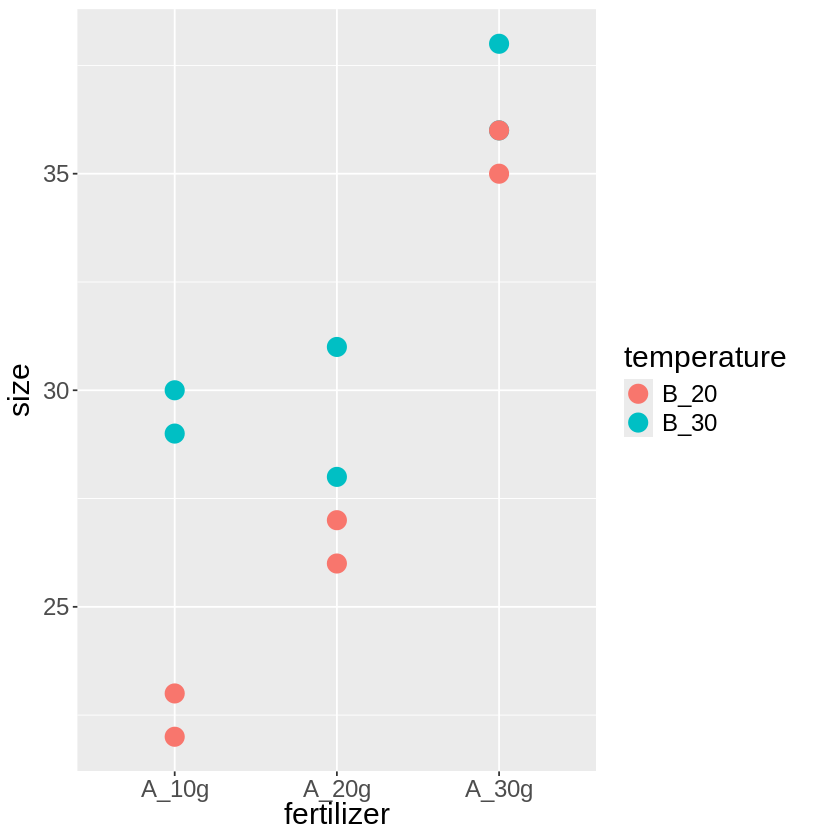

In [ ]:
# 交互作用をグラフで可視化
library(ggplot2)
g <- ggplot(data = df, aes(x = fertilizer , y = size))
g <- g + geom_point(size=5, aes(colour = temperature))
g <- g + theme(text = element_text(size = 18))
g

最初に扱った一元配置の分散分析も

```
aov(size~fertilizer, data=df)
```
の様な形で実行できます。

In [ ]:
# aov関数で一元配置の分散分析を実施する
anova_result <- aov(size ~ fertilizer, data=df)
summary(anova_result)
TukeyHSD(anova_result)

            Df Sum Sq Mean Sq F value  Pr(>F)   
fertilizer   2 236.17  118.08   15.46 0.00123 **
Residuals    9  68.75    7.64                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = size ~ fertilizer, data = df)

$fertilizer
             diff       lwr       upr     p adj
A_20g-A_10g  2.00 -3.456528  7.456528 0.5815639
A_30g-A_10g 10.25  4.793472 15.706528 0.0013800
A_30g-A_20g  8.25  2.793472 13.706528 0.0056851


#### (参考)繰り返しのない二元配置分散分析

分散分析の最後に、先ほどの例とは違って反復が無い場合を考えてみます。

\begin{array}{cccc}  \hline
 & 施肥量 & 10g & 20g & 30g \\ \hline
  温度 & 30度 & 30 & 31 & 38  \\ \hline
  温度 & 20度 & 23 & 26 & 36 \\ \hline
\end{array}

この場合どうなるかというと、交互作用と実験誤差を分離する事が出来なくなります。

例)施肥量$10g$・温度$20$度の時顕著に下がるのは、交互作用の効果によるのか、普段そこまで下がらないが偶然低めの観測値が出てしまったからなのかが分からない。

そのため、従来の知見などから交互作用が存在せず、主効果(因子$A$と因子$B$の効果)のみが影響を与えていると分かっている場合でないと分析できません。

交互作用効果が無いものとして、下の様な分散分析表の結果を求めていく形になります。

\begin{array}{c|cccc}  \hline
 要因 & 平方和 & 自由度 & 平均平方 & F値 \\ \hline
  級間A & S_A & \nu_A & V_A=S_A/\nu_A & F_A=V_A/V_e \\
  級間B & S_B & \nu_B & V_B=S_B/\nu_B & F_B=V_B/V_e \\
  誤差E & S_e & \nu_e & V_e=S_e/\nu_e & \\ \hline
  計 & S_T & \nu_T & & \\ \hline
\end{array}

ただし、現実の実験計画で反復が無いということはほぼあり得ないので、なかなかこのような状況になることは無いでしょう。

## その他の検定方法

これまでに母数について検定する手法をいくつか紹介してきましたが、

データの種類や前提条件に応じて、他にも様々な検定方法が存在します。

例えば、これまで扱っていたような正規分布に従う連続的な値を対象とした検定とは異なり、順序や順位など、正規性が仮定しづらい場合には**ノンパラメトリック検定**が活用されます。

**符号検定**、**マン・ホイットニーのU検定**、**ウィルコクソンの順位和検定**などがノンパラメトリック検定にあたります。

いずれの手法も、帰無仮説の下ある統計量を計算し、パーセント点と比較をする、という流れはほとんど変わりません。

群馬大学の青木先生のページに大まかなパラメトリック検定とノンパラメトリック検定の手法対応・分類表があるので、必要に応じて見てみてください。
http://aoki2.si.gunma-u.ac.jp/lecture/Kentei/nonpara.html

殆どすべての手法をRで実行することが可能です。

## (参考)検出力分析・サンプルサイズ決定

### 検出力

検定を実施する際に、本当は帰無仮説($H_0$)が正しいのに、対立仮説($H_1$)を採択してしまう過誤が**第一種の過誤**(Type I error)で、本当は対立仮説($H_1$)が正しいのに、帰無仮説($H_0$)を採択してしまう過誤を**第二種の過誤**(Type II error)と呼びました。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/false_positive.png?raw=true" alt="title" height="200px">

この第一種の過誤が有意水準$\alpha$のことを指していましたが、

有意水準と対するものとして、**検出力**があります。

第二種の過誤の確率を$\beta$とすると、検出力は$1-\beta$で表されます。つまり、帰無仮説が正しくないときに、正しく帰無仮説を棄却する確率を表します。

検出力は、実施した検定の能力がどのくらいだったのかを表す指標になります。

検出力を計算する際には、対立仮説をより具体的に考える必要があります。(なのでややこしい)

例えばある島に草丈の標本平均が25㎝の植物がいたとします。

この草丈の母平均が10cmかどうかを検定する場合、

帰無仮説$H_0: \mu = 10$

対立仮説$H_1: \mu \ne 10$

となります。この場合は15㎝の差が有意かどうか調べることになるので、$H_0$が簡単に棄却されそうです。

では草丈の母平均が24cmかどうかを検定する場合、

帰無仮説$H_0: \mu = 24$

対立仮説$H_1: \mu \ne 24$

となり、この場合は1cmの差が有意かどうか調べることになるので、$H_0$はなかなか棄却されなさそうな感じがします。

平均値の差を検定する場合だと、この差によって$H_1$を棄却できる確率は変わってきます。

この検出したい差のことを**効果量**と呼びます。効果量が大きいほど当然ですが検出力は高くなります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter7/power.png?raw=true" alt="title" height="200px">

また、当然ですがサンプル数も大きく検出力に影響します。

帰無仮説が$H_0: \mu = 24$だったとしても、サンプル数1,000,000個体位集めれば、標本平均は限りなく25に近付いていくので、$H_0$も棄却できそうです。

この様に、検出力は有意水準$\alpha$、効果量、サンプルサイズによって決まります。

<br>

検出力はRの`power.t.test`等の関数によって計算する事が出来ます。

例えば、$t$検定において、効果量$5$、標本の標準偏差が$1.5$程度、有意水準$\alpha=0.05$、標本数$10$の時の検出力は…

In [ ]:
# ある条件下での検出力をpower.t.test関数で計算する
power.t.test(n = 10, delta = 5, sd = 1.5, sig.level = 0.05, power = NULL, type = "two.sample", alternative = "two.sided")


     Two-sample t test power calculation 

              n = 10
          delta = 5
             sd = 1.5
      sig.level = 0.05
          power = 0.9999998
    alternative = two.sided

NOTE: n is number in *each* group


power = 0.9999998ということで、とても検出力が高いです。(基準は大体0.8や0.9が使用されることが多いです。)

効果量(`delta`の部分)をもっと小さくして、効果量$1$にしてみると

In [ ]:
# ある条件下での検出力をpower.t.test関数で計算する
power.t.test(n = 10, delta = 1, sd = 1.5, sig.level = 0.05, power = NULL, type = "two.sample", alternative = "two.sided")


     Two-sample t test power calculation 

              n = 10
          delta = 1
             sd = 1.5
      sig.level = 0.05
          power = 0.2917418
    alternative = two.sided

NOTE: n is number in *each* group


power = 0.2917418ということで、一気に検出力が下がりました。

### サンプルサイズの設計

同じ関数`power.t.test`を使用することで、効果量が$1$の時に、検出力0.9を達成するのに必要な標本サイズは？ということも計算できます。

先ほどの$t$検定において、効果量$1$、標本の標準偏差が$1.5$程度、有意水準$\alpha=0.05$において、検出力$0.9$を達成するために必要な標本サイズは…

In [ ]:
# ある検出力を達成するための標本サイズをpower.t.test関数で計算する
power.t.test(n = NULL, delta = 1, sd = 1.5, sig.level = 0.05, power = 0.9, type = "two.sample", alternative = "two.sided")


     Two-sample t test power calculation 

              n = 48.26431
          delta = 1
             sd = 1.5
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: n is number in *each* group


$n = 48.26431$ということで、約$50$の標本サイズが必要ということが分かります。

In [ ]:
# ある検出力を達成するための標本サイズをpower.t.test関数で計算する
power.t.test(n = NULL, delta = 15, sd = 1.5, sig.level = 0.05, power = 0.9, type = "two.sample", alternative = "two.sided")


     Two-sample t test power calculation 

              n = 1.762908
          delta = 15
             sd = 1.5
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: n is number in *each* group


この様な形で、目的とする効果量をある程度の検出力を持って検出するために必要なサンプルサイズの設計ができます。

$t$検定以外にも、`power.prop.test`や`power.anova.test`などの関数が準備されており、様々な検定の検出力・サンプルサイズ計算が可能です。

実験計画を立てる際に、大まかにこの様な計算をしてサンプル数等を設計できれば理想的です。

サンプルサイズが小さすぎると、本来検出出来る差が検出できず実験自体に意味がなくなってしまう可能性があります。

また、サンプルサイズが大きすぎると、コストの問題や統計的に有意になりやすくなるという問題があります。

したがって、実験は適切なサンプルサイズに対して行う必要があります。

## 研究倫理・注意点(p値ハッキング)

最後に、検定を行う際に避けるべき行為である**p値ハッキング**について説明します。

p値ハッキングとは、統計的に有意でないデータを、有意と示してしまう誤ったデータ分析の行為です。

多重比較で扱った検定を繰り返す行為もこれにあたります。

(本来有意ではないものが、検定を繰り返すことによって有意と出てしまう。)

他にも、

* 検定の結果有意では無かったので、新たなデータを取得・追加した
* 恣意的に外れ値と判断し、いくつかの測定値を除外した
* 都合が良い測定値を選択的に抽出した
* 有意になるように検定手法を変えたり、検定に微調整を加えた

などがこの行為に当たります。

p値ハッキングは意図的に行う場合もあれば、意図せず行ってしまっていた場合もあります。

この様な不正行為を避けるためにも、使用する統計手法について正しく理解し、下記の様な点について常に気を付けておく必要があります。

* 事前に研究計画を立てる
  * 結果に合わせて検定手法を変えてはいけない
* p < 0.05はあくまでも1つの基準なので、実際にデータが意味する所は何かを意識する
  * p = 0.051のため有意差が無い=本当に意味がない？

* データの選択を行う場合、理論的に正しい基準で実施されているかどうか確かめる
* 解析したデータの透明性を確保する